<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Признаки" data-toc-modified-id="Признаки-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Признаки</a></span></li><li><span><a href="#Целевой-признак" data-toc-modified-id="Целевой-признак-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Целевой признак</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных
#### Признаки  
    RowNumber — индекс строки в данных  
    CustomerId — уникальный идентификатор клиента  
    Surname — фамилия  
    CreditScore — кредитный рейтинг  
    Geography — страна проживания  
    Gender — пол  
    Age — возраст  
    Tenure — сколько лет человек является клиентом банка  
    Balance — баланс на счёте  
    NumOfProducts — количество продуктов банка, используемых клиентом  
    HasCrCard — наличие кредитной карты  
    IsActiveMember — активность клиента  
    EstimatedSalary — предполагаемая зарплата  
#### Целевой признак  
    Exited — факт ухода клиента

## Подготовка данных

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')
# import mglearn
from sklearn.utils import shuffle

In [100]:
try:
    df = pd.read_csv("/datasets/Churn.csv")
except:
    df = pd.read_csv("Churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,9091.0,4.997690e+00,2.894723,0.00,2.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


Датафрейм сотоит из 13 столбцов и 10000 строк. В данных есть пропуски в столбце **Tenure**

<AxesSubplot:>

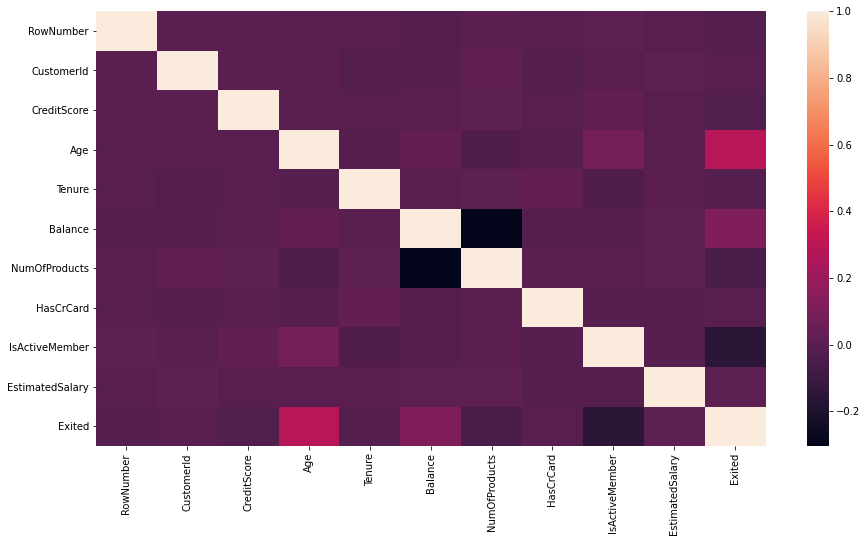

In [103]:
# построим матрицу корреляции
corr = df.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

Судя по графику сильных зависимостей между переменными нет, поэтому можно смело продолжать

In [104]:
# первые 3 столбца для нашей модели не нужны, поэтому можно их удалить
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [105]:
# посмотрим наличие пропусков
df.isna().sum()

CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [106]:
# посмотрим наличие дубликатов
df.duplicated().sum()

0

In [107]:
#заменим пропущенные значения на 0
df["Tenure"].fillna(0, inplace=True)

In [108]:
#удостоверимся что пропущенных значений нет
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [109]:
#меняем значение столбца на целое
df["Tenure"] = df["Tenure"].astype("Int64")

In [110]:
#смотрим распределение данных в столбце Geography
df["Geography"].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [111]:
df["Gender"].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

In [112]:
#проведем кодирование с помощью OHE
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [113]:
#с помощью train_test_split разделим наш датасет на следующие выборки 
features = df.drop("Exited", axis=1)
target = df["Exited"]

features_train, features_valid, target_train, target_valid = train_test_split \
    (features, target, test_size=0.4, random_state=12345)

In [114]:
features_valid, features_test, target_valid, target_test = train_test_split \
    (features_valid, target_valid, test_size=0.5, random_state=12345)

In [115]:
#стандартизируем признаки
numeric = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,8,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,8,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,3,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,6,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,2,1.140475,1,0,0,1.524268,1,0,0


In [116]:
print('Размер тренировочной выборки', features_train.shape[0])
print('Размер валидационной выборки:', features_valid.shape[0])
print('Размер тестовой выборки', features_test.shape[0])

Размер тренировочной выборки 6000
Размер валидационной выборки: 2000
Размер тестовой выборки 2000


### Вывод:  
> Мы проведели исследование наших данных и выяснили:  
    дубликатов в данных нет;  
    есть пропущенные значения в столбце **Tenure**, которые, после изучения ДФ в Kaggle заменили на 0  
    удалили 3 столбца, которые нам не нужны при построении модели  
    
> Далее мы провели кодирование признаков со строковыми значениями и стандартизировали признаки.
> Разделили наш датафрейм на тренировочную, валидационную и тестовую выборки, соотношением 60-20-20

## Исследование задачи

In [117]:
# модель LogisticRegression
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
f1 = f1_score(target_valid, predicted_valid)
print('Accuracy:', accuracy_valid)
print('F1:', f1)

confusion_matrix(target_valid, predicted_valid)

Accuracy: 0.8025
F1: 0.33389544688026984


array([[1506,   76],
       [ 319,   99]], dtype=int64)

In [118]:
# модель RandomForestClassifier
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid, target_valid)
f1 = f1_score(target_valid, predicted_valid)
print('Accuracy:', accuracy_valid)
print('F1:', f1)

confusion_matrix(target_valid, predicted_valid)

Accuracy: 0.8585
F1: 0.5807407407407408


array([[1521,   61],
       [ 222,  196]], dtype=int64)

**Модель случайного леса показала наилучший результат, который практически равен требуемому результату**

## Борьба с дисбалансом

In [119]:
# рассмотри модель СлучайногоЛеса на различных глубине и количестве деревьев
for est in range(1,30,10):
    for depth in range(1,151,10):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight="balanced", max_depth=depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        result = accuracy_score(target_valid, predictions)
        f1 = f1_score(target_valid, predictions)
    
        print('Est:', est, end='')
        print('       Depth:', depth, end='')
        print('       Accuracy:', result)
        print('F1:', f1)

Est: 1       Depth: 1       Accuracy: 0.8155
F1: 0.2484725050916497
Est: 1       Depth: 11       Accuracy: 0.7435
F1: 0.5118934348239772
Est: 1       Depth: 21       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 31       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 41       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 51       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 61       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 71       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 81       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 91       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 101       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 111       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 121       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 131       Accuracy: 0.7715
F1: 0.4642438452520516
Est: 1       Depth: 141       A

In [120]:
#попробуем обучить нашу модель с помощью увеличения выборки
def upsampling(features, target, repeat):
    features_zeros = features_train[target_train == 0]
    features_ones = features_train[target_train == 1]
    target_zeros = target_train[target_train == 0]
    target_ones = target_train[target_train == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled


for repeat in range(1,30,1):
    features_upsampled, target_upsampled = upsampling(features_train, target_train, repeat)

    model = RandomForestClassifier(random_state=12345, class_weight="balanced")
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    print("F1_Score: {: >5.3f}  |   Repeats : {: >5.0f}".format(f1_score(target_valid, predictions_valid),repeat))

F1_Score: 0.577  |   Repeats :     1
F1_Score: 0.589  |   Repeats :     2
F1_Score: 0.594  |   Repeats :     3
F1_Score: 0.607  |   Repeats :     4
F1_Score: 0.603  |   Repeats :     5
F1_Score: 0.609  |   Repeats :     6
F1_Score: 0.602  |   Repeats :     7
F1_Score: 0.601  |   Repeats :     8
F1_Score: 0.605  |   Repeats :     9
F1_Score: 0.608  |   Repeats :    10
F1_Score: 0.612  |   Repeats :    11
F1_Score: 0.608  |   Repeats :    12
F1_Score: 0.609  |   Repeats :    13
F1_Score: 0.598  |   Repeats :    14
F1_Score: 0.606  |   Repeats :    15
F1_Score: 0.595  |   Repeats :    16
F1_Score: 0.598  |   Repeats :    17
F1_Score: 0.601  |   Repeats :    18
F1_Score: 0.604  |   Repeats :    19
F1_Score: 0.608  |   Repeats :    20
F1_Score: 0.599  |   Repeats :    21
F1_Score: 0.602  |   Repeats :    22
F1_Score: 0.615  |   Repeats :    23
F1_Score: 0.593  |   Repeats :    24
F1_Score: 0.596  |   Repeats :    25
F1_Score: 0.596  |   Repeats :    26
F1_Score: 0.602  |   Repeats :    27
F

In [121]:
features_upsampled, target_upsampled = upsampling(features_train, target_train, 29)

model = RandomForestClassifier(random_state=12345, class_weight="balanced")
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)
f1_score(target_valid, predictions_valid)

0.613157894736842

> Вывод:  
**При est = 21 и максимальной глубине = 11 у нас наблюдается F1 = 0.598, Accuracy = 0.8395**, мы добились требуемых результатов. 
Так же при увеличении выборки нам удалось увеличить f1_score до 0.613.  
Перейдем к тестированию модели.  

## Тестирование модели

In [125]:
model = RandomForestClassifier(random_state=12345, n_estimators=21, class_weight="balanced", max_depth=11)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_test)
accuracy_valid = accuracy_score(predicted_valid, target_test)
f1 = f1_score(target_test, predicted_valid)
print('Accuracy:', accuracy_valid)
print('F1:', f1)

Accuracy: 0.8405
F1: 0.5967130214917826


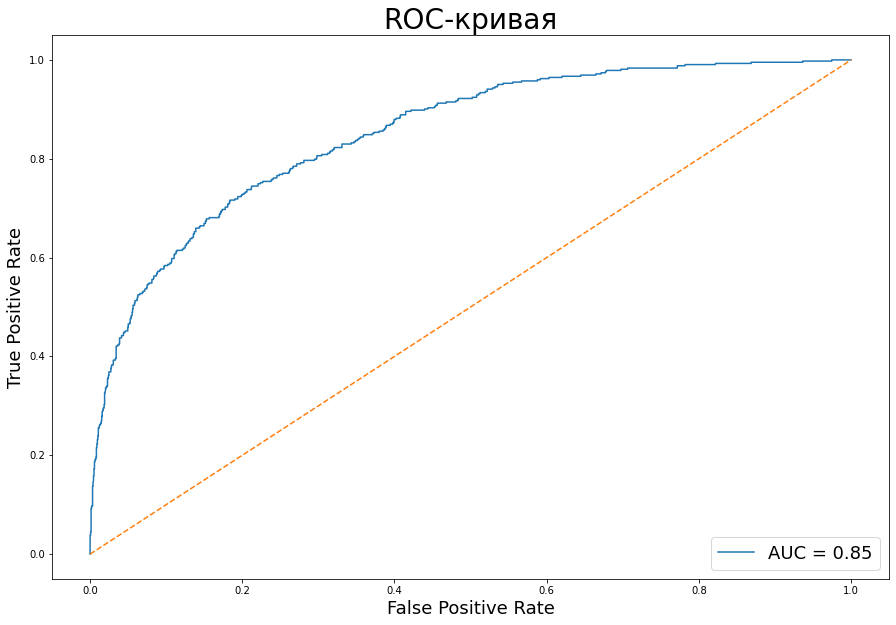

In [126]:
#Построим ROC-кривую, как учили в тренажере
import sklearn.metrics as metrics
predicted_valid = model.predict_proba(features_test)
predicted_valid_one = predicted_valid[:,1]
predicted_valid_one

fpr, tpr, thesholds = roc_curve(target_test, predicted_valid_one)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(15,10))
plt.plot(fpr, tpr, label= "AUC = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)
plt.legend(loc = "lower right", fontsize=18)
plt.title("ROC-кривая", fontsize=28)
plt.show()

> **Общий вывод:**  
    1. Провели исследование данных в нашем датасете.  
    2. Использовав две модели случайного леса и логистической регрессии мы выбрали модель случайного леса так как на начальном этапе она показала наилучший результат.  
    3. Применив метод подбора количества деревьев и глубины леса через цикл мы нашли наилучшие параметры для нашей модели и получили F1 : 0.596
    4. Отрисовали ROC-кривую и получили AUC: 0.85, что значительно больше случайного порога в 0.5, отсюда можно сделать вывод что наша модель предсказывает достаточно хорошо.